# Time Series Data Visualization 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
print('modules are imported')
import datetime as dt

modules are imported


In [2]:
data_url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
data = pd.read_csv(data_url)
data['Date'] = pd.to_datetime(data['Date'])
data.shape

(161568, 5)

In [3]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


### Choose only Confirmed and Deaths cases and country United States and only 3 columns: Date, Confirmed and Deaths

In [4]:
data_us = data[(data.Country == 'US') & (data.Confirmed > 0)]
data_us = data_us[['Date', 'Confirmed', 'Deaths']]

In [5]:
data_us['New_cases'] = data_us['Confirmed'].diff().fillna(0)
data_us['New_deaths'] = data_us['Deaths'].diff().fillna(0)

### Also make Moving Average columns

In [6]:
data_us['Cases_avg'] = data_us.New_cases.rolling(7).mean().fillna(0)
data_us['Deaths_avg'] = data_us.New_deaths.rolling(7).mean().fillna(0)

In [7]:
data_us.head()

,Date,Confirmed,Deaths,New_cases,New_deaths,Cases_avg,Deaths_avg
149328,2020-01-22,1,0,0.0,0.0,0.0,0.0
149329,2020-01-23,1,0,0.0,0.0,0.0,0.0
149330,2020-01-24,2,0,1.0,0.0,0.0,0.0
149331,2020-01-25,2,0,0.0,0.0,0.0,0.0
149332,2020-01-26,5,0,3.0,0.0,0.0,0.0


### Make some Research

In [8]:
px.line(data_us, x = 'Date', y = ['Confirmed', 'Deaths'])

In [9]:
px.line(data_us, x = 'Date', y = ['New_cases', 'Cases_avg'])


In [10]:
px.line(data_us, x = 'Date', y = ['New_deaths', 'Deaths_avg'])

### Let's find what the avarage, maximum and total number of cases for each month 

In [11]:
data_us['month-year'] = data_us['Date'].dt.to_period('M')
data_us.set_index('Date', inplace=True)

In [12]:
agg = data_us.groupby('month-year').agg(['sum', 'mean', 'max']).head()
agg.head()

Confirmed                          Deaths                        \
                 sum          mean      max      sum          mean     max   
month-year                                                                   
2020-01           41  4.100000e+00        8        0      0.000000       0   
2020-02          402  1.386207e+01       25        1      0.034483       1   
2020-03      1121455  3.617597e+04   192079    26042    840.064516    5359   
2020-04     19836514  6.612171e+05  1076517  1069589  35652.966667   66154   
2020-05     45295889  1.461158e+06  1788236  2799458  90305.096774  107674   

           New_cases                        New_deaths                       \
                 sum          mean      max        sum         mean     max   
month-year                                                                    
2020-01          7.0      0.700000      3.0        0.0     0.000000     0.0   
2020-02         17.0      0.586207      8.0        1.0     0.034483     1.0   
2020-03     192054.0   6195.290323  26381.0     5358.0   172.838710  1079.0   
2020-04     884438.0  29481.266667  35610.0    60795.0  2026.500000  2598.0   
2020-05     711719.0  22958.677419  34892.0    41520.0  1339.354839  2319.0   

                Cases_avg                                Deaths_avg  \
                      sum          mean           max           sum   
month-year                                                            
2020-01          2.857143      0.285714      0.857143      0.000000   
2020-02         12.285714      0.423645      1.285714      0.142857   
2020-03     127053.000000   4098.483871  19337.857143   3097.571429   
2020-04     868365.428571  28945.514286  31979.857143  56905.571429   
2020-05     728615.000000  23503.709677  28221.857143  44838.142857   

                                      
                   mean          max  
month-year                            
2020-01        0.000000     0.000000  
2020-02        0.004926     0.142857  
2020-03       99.921659   618.000000  
2020-04     1896.852381  2243.285714  
2020-05     1446.391705  1908.428571

In [13]:
max_number_new_cases = dict(data_us.groupby('month-year').New_cases.max())
max_cases_df = pd.DataFrame.from_dict(max_number_new_cases, orient='index', columns=['Max_number_cases'])
max_cases_df.reset_index(inplace=True)
max_cases_df = max_cases_df.rename(columns = {'index': 'Month'})
max_cases_df.Month = max_cases_df.Month.astype(str)

In [14]:
px.bar(max_cases_df, x='Month', y='Max_number_cases', color='Month', 
                     title='Maximum Number of New Cases per Month', text_auto='.2s')

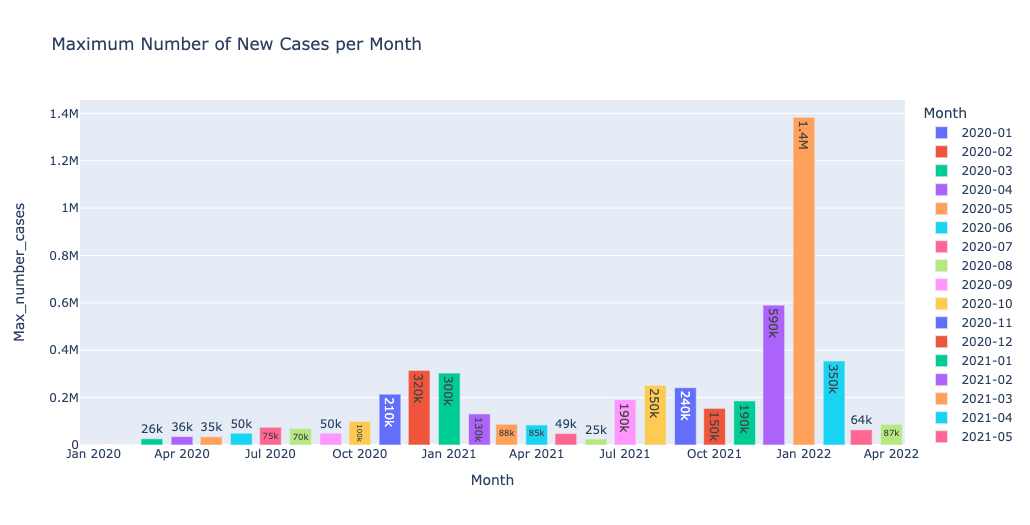

In [15]:
total_number_new_cases = dict(data_us.groupby('month-year').New_cases.sum())
total_cases_df = pd.DataFrame.from_dict(total_number_new_cases, orient='index', columns=['Total_number_cases'])
total_cases_df.reset_index(inplace=True)
total_cases_df = total_cases_df.rename(columns = {'index': 'Month'})
total_cases_df.Month = total_cases_df.Month.astype(str)

In [16]:
px.bar(total_cases_df, x='Month', y='Total_number_cases', 
       color='Month', title='Total Number of New Cases for Each Month', text_auto='.2s')

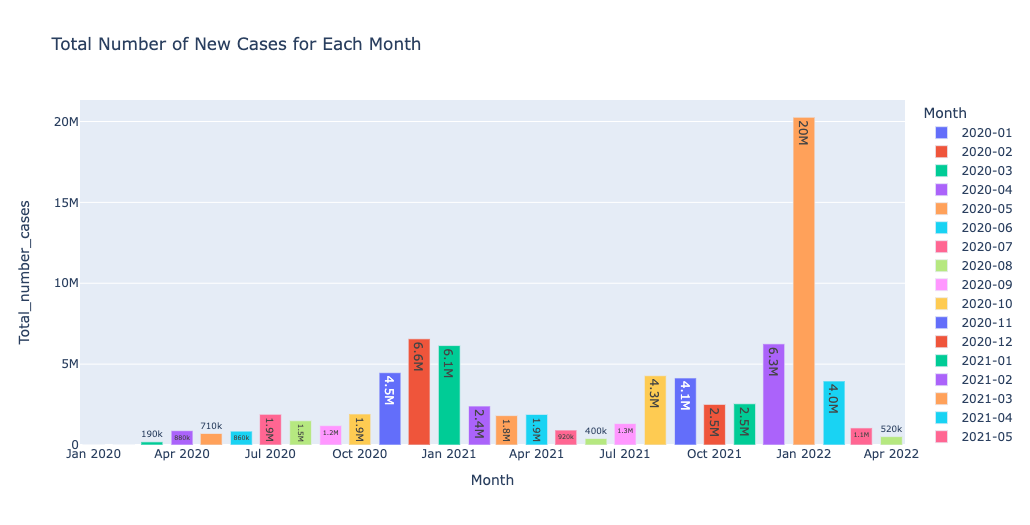

In [17]:
total_number_deaths = dict(data_us.groupby('month-year').New_deaths.sum())
total_deaths_df = pd.DataFrame.from_dict(total_number_deaths, orient='index', columns=['Total_number_deaths'])
total_deaths_df.reset_index(inplace=True)
total_deaths_df = total_deaths_df.rename(columns = {'index': 'Month'})
total_deaths_df.Month = total_deaths_df.Month.astype(str)

In [18]:
px.bar(total_deaths_df, x='Month', y='Total_number_deaths', 
       color='Month', title='Total Number of New Deaths for Each Month', text_auto='.2s')

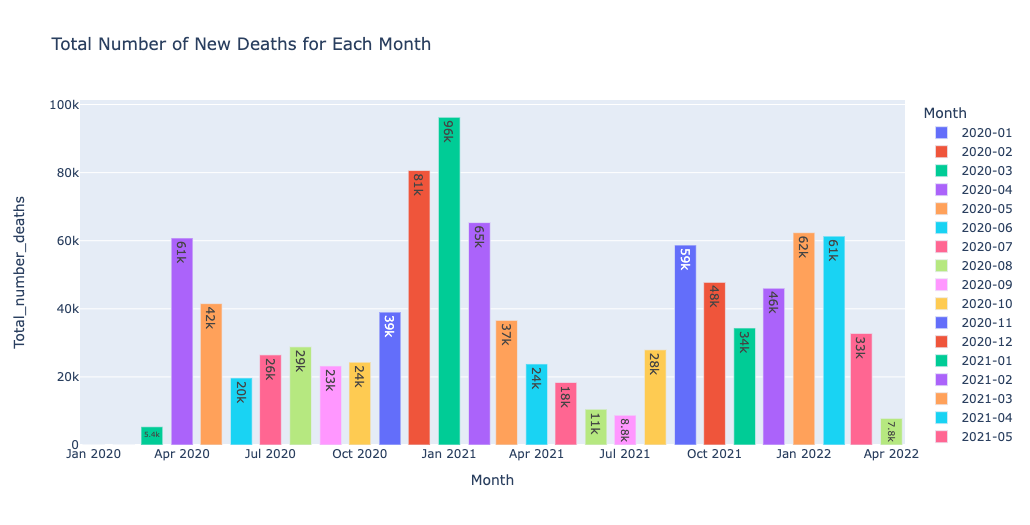

In [19]:
avg_number_deaths = dict(data_us.groupby('month-year').New_deaths.mean())
avg_deaths_df = pd.DataFrame.from_dict(avg_number_deaths, orient='index', columns=['Avg_number_deaths'])
avg_deaths_df.reset_index(inplace=True)
avg_deaths_df = avg_deaths_df.rename(columns = {'index': 'Month'})
avg_deaths_df.Month = avg_deaths_df.Month.astype(str)

In [20]:
px.bar(avg_deaths_df, x='Month', y='Avg_number_deaths', 
       color='Month', title='Average Number of Deaths for Each Month', text_auto='.2s')

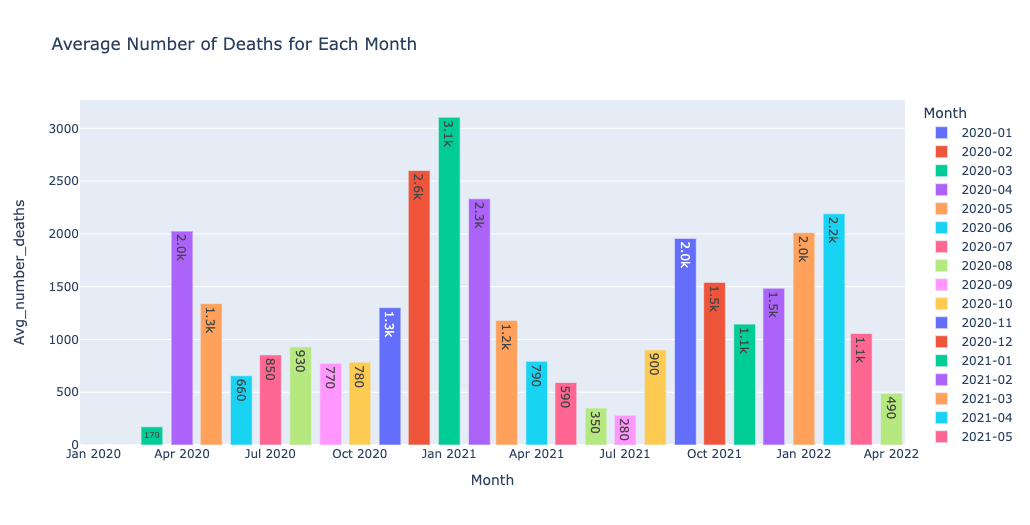

In [21]:
data_agg = max_cases_df.merge(total_cases_df).merge(total_deaths_df).merge(avg_deaths_df)
data_agg['Ratio_all_deaths_all_cases, %'] = round(data_agg['Total_number_deaths'] / data_agg['Total_number_cases'] * 100, 1)

In [22]:
data_agg.head()

,Month,Max_number_cases,Total_number_cases,Total_number_deaths,Avg_number_deaths,"Ratio_all_deaths_all_cases, %"
0,2020-01,3.0,7.0,0.0,0.000000,0.0
1,2020-02,8.0,17.0,1.0,0.034483,5.9
2,2020-03,26381.0,192054.0,5358.0,172.838710,2.8
3,2020-04,35610.0,884438.0,60795.0,2026.500000,6.9
4,2020-05,34892.0,711719.0,41520.0,1339.354839,5.8


In [23]:
px.bar(data_agg, x='Month', y='Ratio_all_deaths_all_cases, %', 
       color='Month', title='Ratio of Total Number of Deaths to Total Number of Cases in %', text_auto=True)

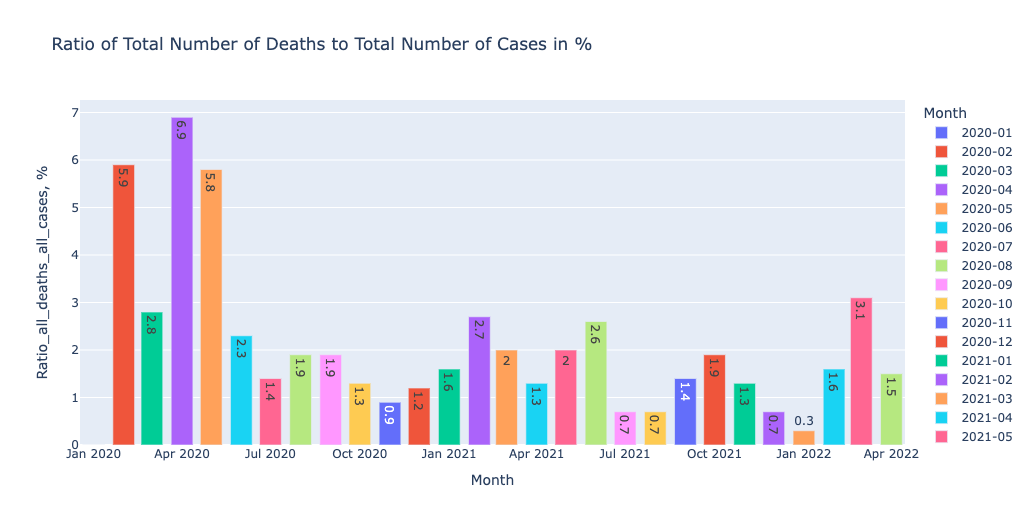

In [28]:
px.scatter(data_agg, x='Month', y='Ratio_all_deaths_all_cases, %', 
     title='Ratio of Total Number of Deaths to Total Number of Cases in %')


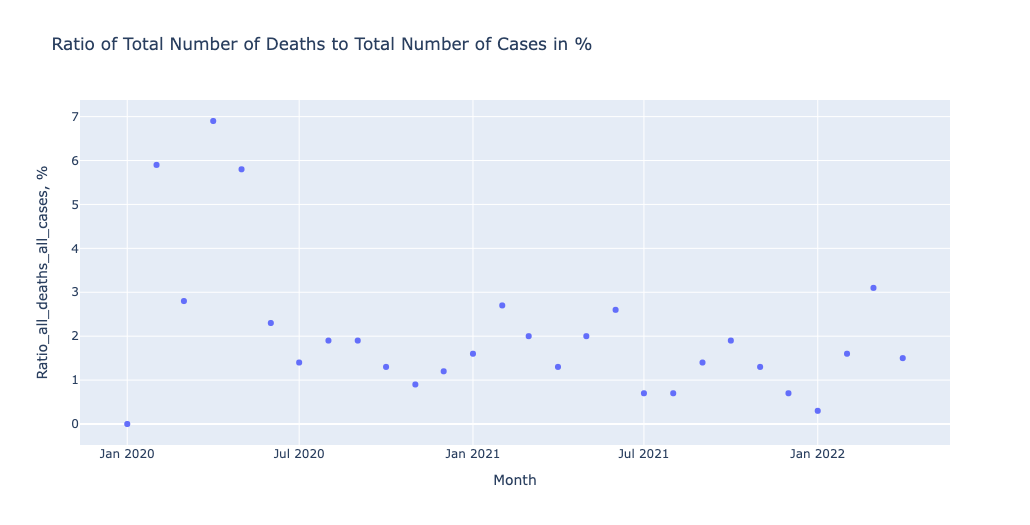

### Find how many patients were recovered per day

In [29]:
data_us['Recover_Rate'] = data_us.New_cases - data_us.New_deaths
data_us['Recover_avg'] = data_us.Recover_Rate.rolling(7).mean()


In [30]:
data_us.reset_index(inplace=True)
px.line(data_us, x = 'Date', y = ['Recover_Rate', 'Recover_avg'])

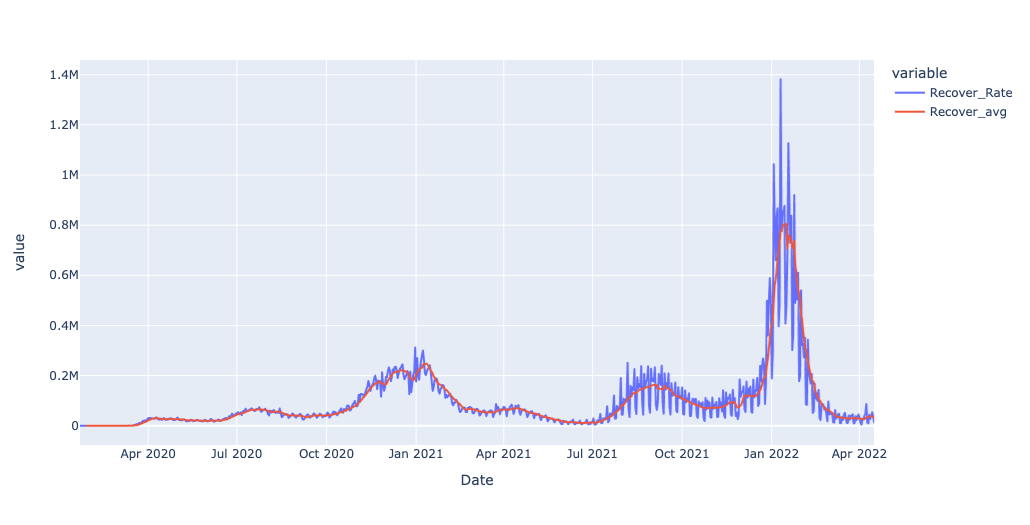

In [31]:
data_us['Recover-Death_ratio'] = data_us['Recover_Rate'] / data_us['New_deaths']

In [32]:
px.line(data_us, x = 'Date', y = 'Recover-Death_ratio')

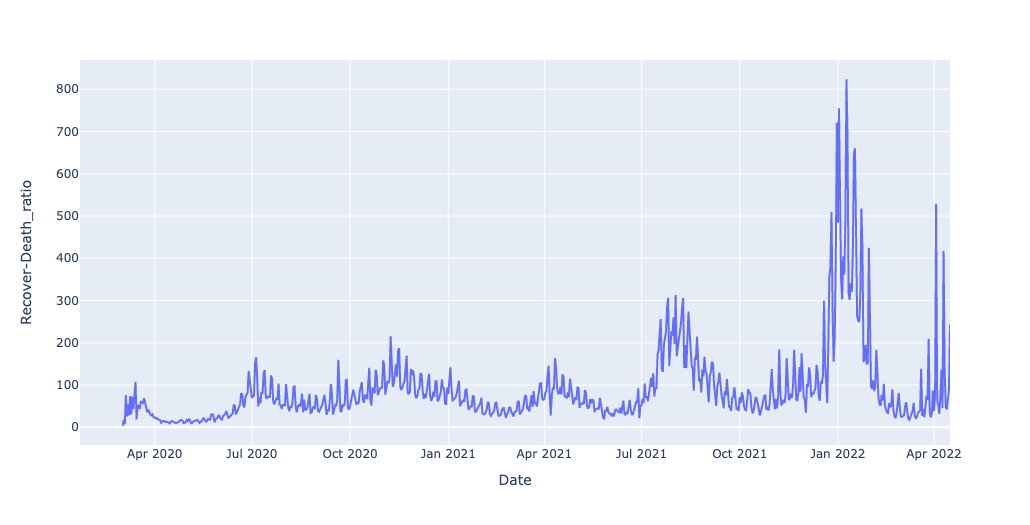

**After visual analisys this Recover-Death Ratio has all components of Time Series**
- Trend
- Seasonality (7 days)
- Cycles (~ 2 months) Peecks: Jul, 5 <> Sep, 20, Nov, 8 <> Jan, 3 <> Apr, 11 <> Aug, 2 <> Nov, 7 <> Jan, 9
- Errors
